# CS530 Homework 8 

Question 1 (3 points)

The question below asks you to mathematically prove that LDA selects a class based only on a linear function of the data. The question starts with a long(ish) introduction, to clarify some matters that we discussed in class, following some questions in the exit survey. Then comes the actual question. 

Bayes theorem states that 
$$ P(A|B)=\frac{P(B|A)P(A)}{P(B)}.$$ 
For a classifier, we want to predict the classification label for some given data. In other words, we want to compute the probability that the label is some $k$ given some data $x$, Mathematically, we want to compure $P(Y=k|X=x)$. 

From the Bayes theorem we know 

$$P(Y=k|X=x)=\frac{P(X=x|Y=k)P(Y=k)}{P(X=x)}.$$ 

To continue, say that we have some event $D$, which can either happen or not, so $P(D)+P(\lnot D)=1$. In that case, for some event $C$, it is true that $P(C)=P(C|D)+P(C|\lnot D)$. Convince yourself of this, if it is not clear to you.

Now, generalizing the above, if one of the mutually exclusive events $D_1, ..., D_n$ must always happen (or $\sum_{i=1}^{n}P(D_i)=1$ and $P(D_i \land D_j)=0, \forall i,j$), then for some event $C$, it is true that $P(C)=\sum_{i=1}^{n}P(C|D_i)P(D_i)$. 

Therefore, $P(X=x)=\sum_{i=1}^{n}P(X=x|Y=i)P(Y=i)$. So, putting it all together, we get 

$$P(Y=k|X=x)=\frac{P(X=x|Y=k)P(Y=k)}{\sum_{i=1}^{n}P(X=x|Y=i)P(Y=i)},$$ 

as we saw in class. We further defined the likelihood function, $f_k(x)=P(X=x|Y=k)$, and the posterior, $\pi_k=P(Y=k).$ So, substituting into the equation above, we get

$$P(Y=k|X=x)=\frac{f_k(x) \cdot \pi_k}{\sum_{i=1}^{n}f_i(x) \cdot \pi_i}.$$ 

What is more, if we specifically want to know whether our classifier should classify data $x$ as class $k_1$ or class $k_2$ (out of some overall $K$ number of classes), we would need to compare $P(Y=k_1|X=x)$ and $P(Y=k_2|X=x)$. In other words, we would prefer class $k_1$ if $P(Y=k_1|X=x)>P(Y=k_2|X=x)$, and vice versa. Put differently yet again, we would prefer class $k_1$ if $\frac{P(Y=k_1|X=x)}{P(Y=k_2|X=x)}>1$. Now, note that $\frac{P(Y=k_1|X=x)}{P(Y=k_2|X=x)}=\frac{P(X=x|Y=k_1)P(Y=k_1)}{P(X=x|Y=k_2)P(Y=k_2)}=\frac{f_{k_1}(x)\pi_{k_1}}{f_{k_2}(x)\pi_{k_2}},$ 

because the denominator ($\sum_{i=1}^{n}f_i(x) \pi_i$) cancels out, as it is not dependent on $k_1$ or $k_2$. So, if we could estimate $P(X=x|Y=k)=f_k$ and $P(Y=k)=\pi_k$ for $k_1$ and $k_2$, we would be able to solve this problem generally, for any classifier. But, that is hard to do in the general case, for any classifier.

However, specifically for 1-dimensional LDA, there is the assumption that the data is distributed normally (i.e., as a Gaussian), so we have

$$P(X=x|Y=k)=f_k(x)=\frac{1}{\sigma_k \sqrt{2\pi}} e^{-\frac{1}{2 \sigma_k^2}\left( x-\mu_k \right)^2}.$$

(Note that the $\pi$ in the definition of the Gaussian just above is the number $3.14159265359...$ and should not be confused with the prior $\pi_k=P(Y=k)$.) 

Therefore, for 1-dimensional LDA, we get

$$P(Y=k|X=x)=\frac{\pi_k \frac{1}{\sigma_k \sqrt{2\pi}} e^{-\frac{1}{2 \sigma_k^2}\left( x-\mu_k \right)^2}}{\sum_{i=1}^{n} \pi_i \frac{1}{\sigma_i \sqrt{2\pi}} e^{-\frac{1}{2 \sigma_i^2}\left( x-\mu_i \right)^2}}.$$

The above was background, rehashing in more detail what we already covered in class. 

**Now comes the question.** 

(a) We have a 1-dimensional classification problem with $K$ classes that we will classify using LDA. We specifically want to decide whether the given data that we have, $x$, should be classified as class $k_1$ or $k_2$. Show that the classification depends linearly on $x$. 

One way to do this is to take the log-ratio of $P(Y=k_1|X=x)$ and $P(Y=k_2|X=x)$ and show that it is a linear function of $x$, in particular that it is equal to $\frac{\mu_{k_1}-\mu_{k_2}}{\sigma^2}x-\frac{\mu_{k_1}^2 - \mu_{k_2}^2}{2\sigma^2}+log\left( \frac{\pi_{k_1}}{\pi_{k_2}} \right)$. 

When working on the above, it is important to remember that the LDA assumes that the data for each class have a Gaussian distribution. But a further assumption is that all the Gaussians have *the same variance*. 

(b) Where in (a) did you need to use the equi-variance assumption—i.e., the assumption that the data for every class have a Gaussian distribution with the same variance? What would happen if the equi-variance assumption did not hold? Explain why, in that case, the classification would depend quadratically on $x$ rather than linearly. As we discussed in class, the relaxation of the equi-variance assumption results in the QDA (Quadratic Discriminant Analysis) algorithm.


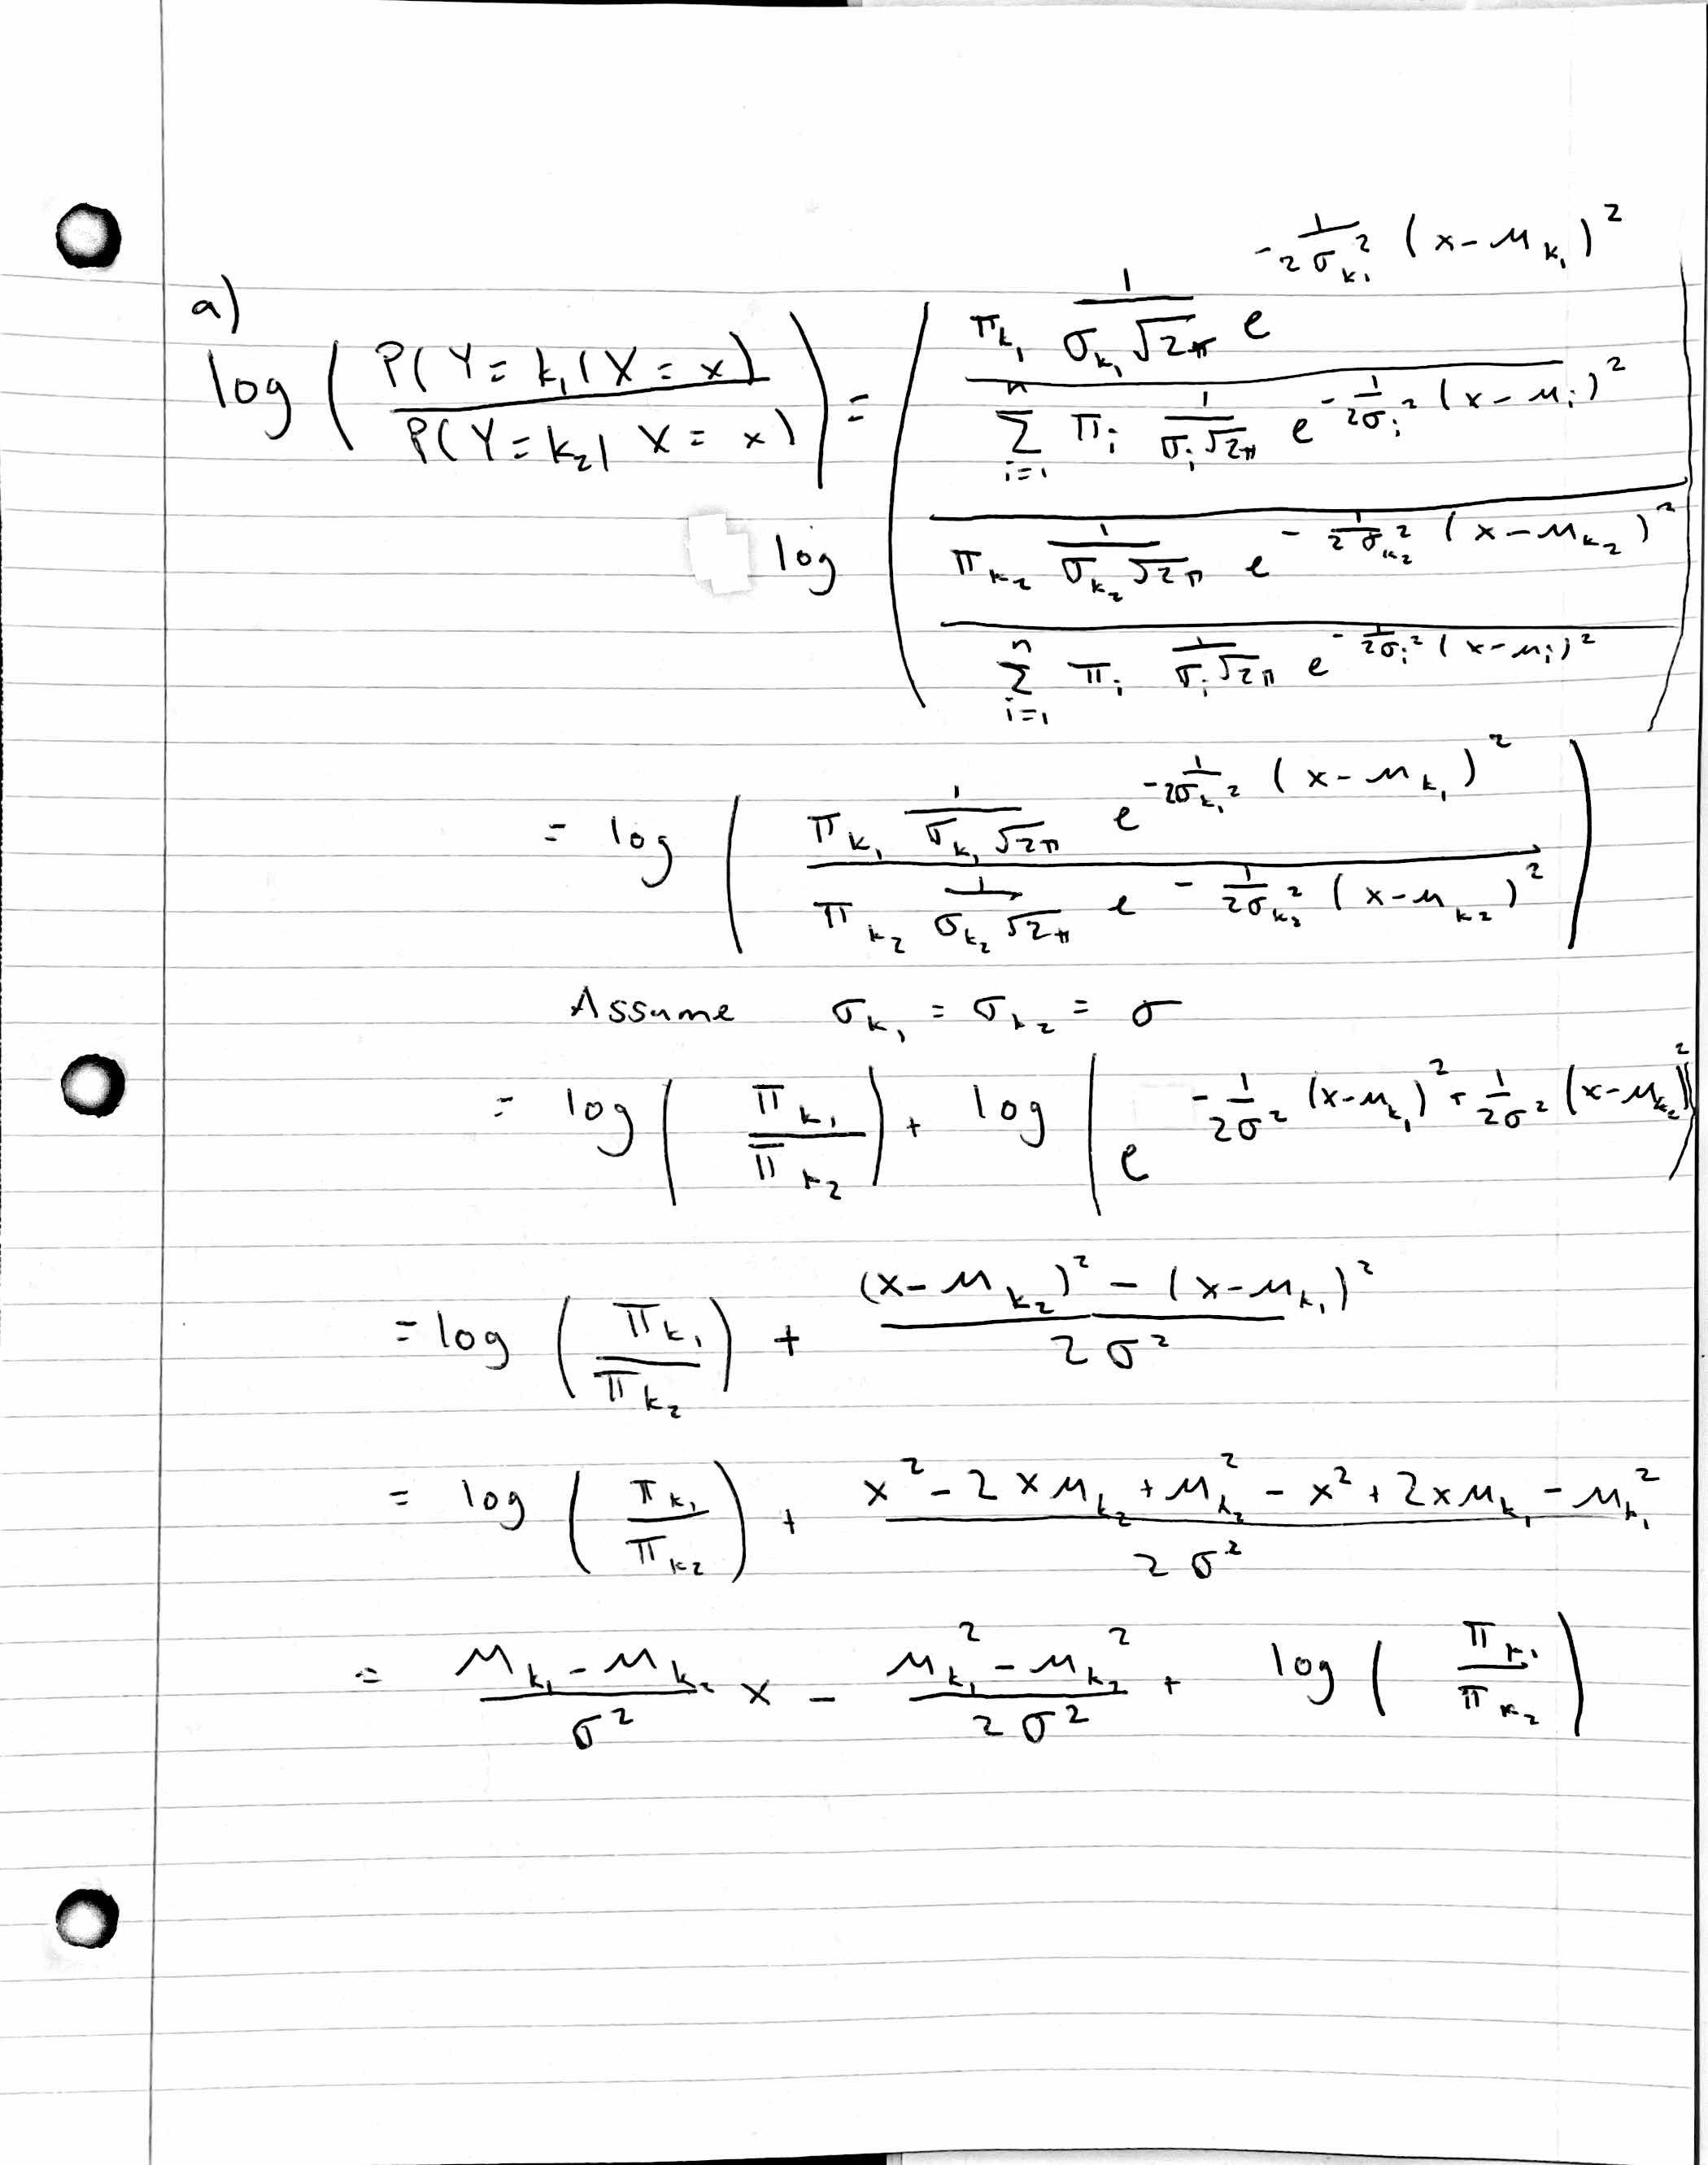

In [228]:
from PIL import Image 
Image.open("Question1_a.jpg") 

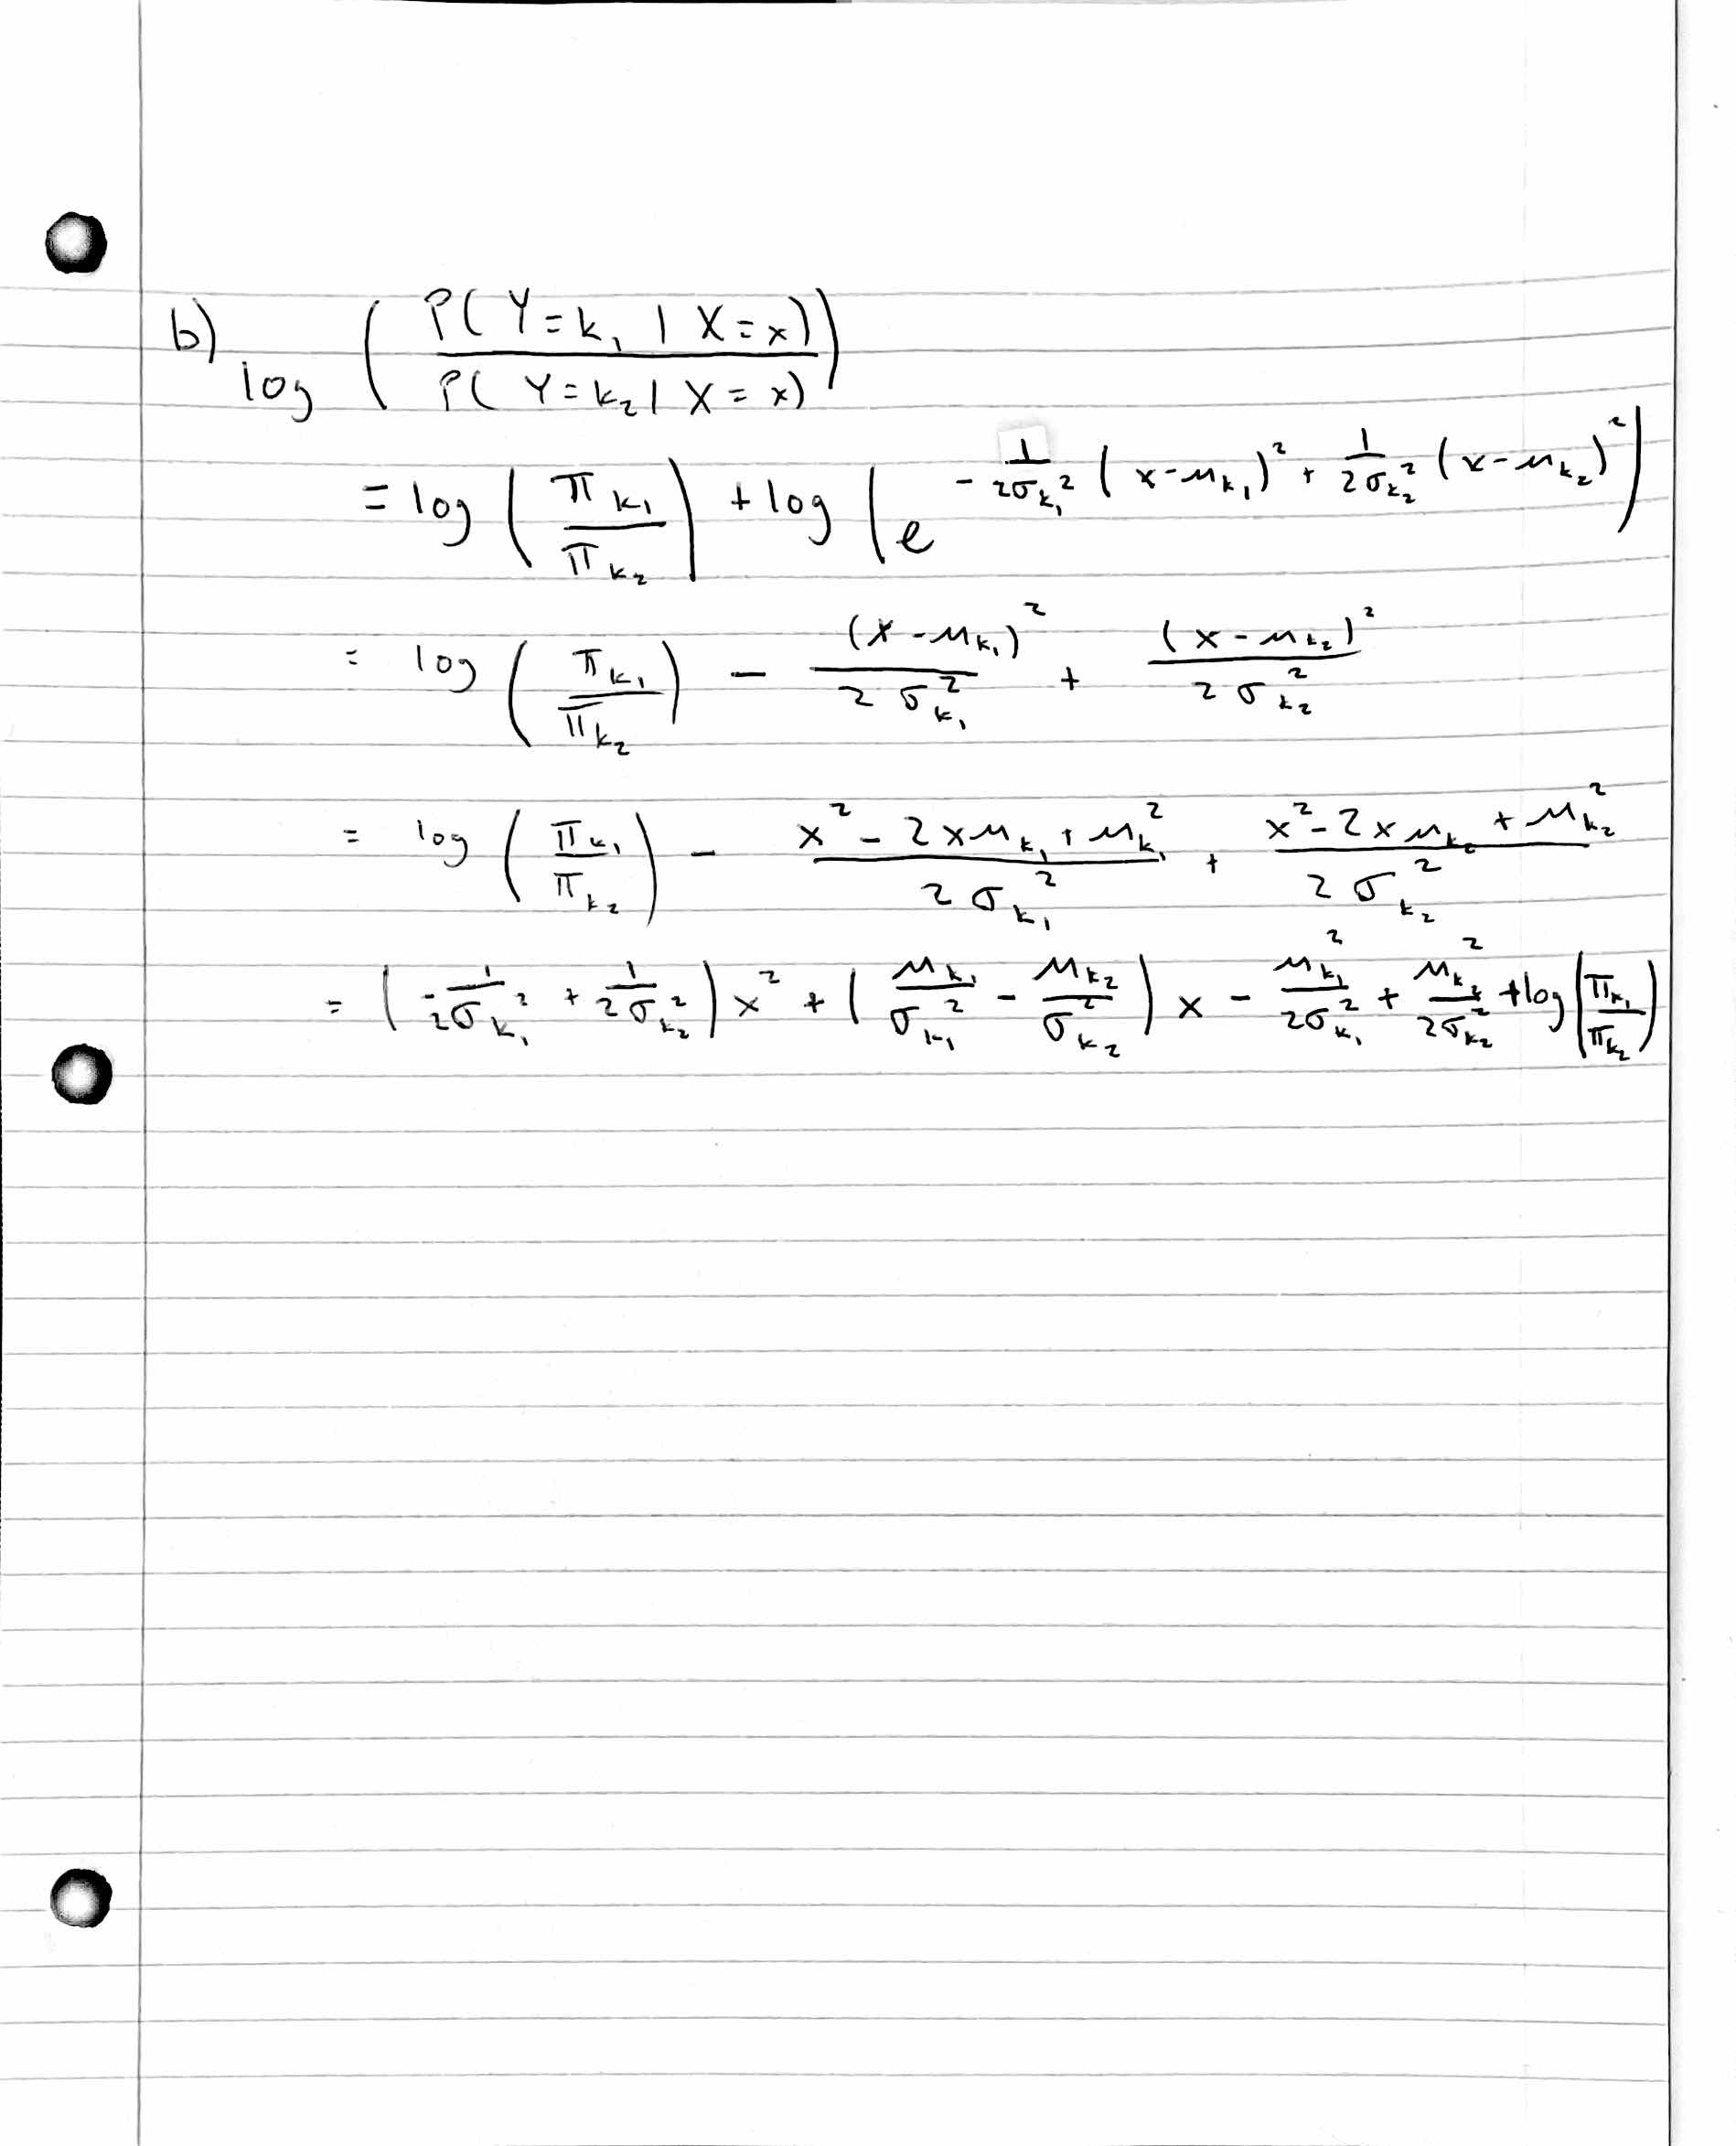

In [229]:
Image.open("Question1_b.jpg") 

a) The log-ratio is a equal to a linear relationship.

b) As shown in the derivation, the log-ratio turns into a quadratic when we don't assume that the variances are equal.

Question 2 (4 points) 

The goal of this question is to make sure that you understand the kNN algorithm and the distance measures we discussed in class via implementation. Therefore, implement from scratch (i.e., not using scikit-learn) the function MyKNN() that classifies the matrix *X_test* (samples × features) using the KNN algorithm we learned in class. The inputs for the function should be the training set, *X_train*, the labels, *y_train*, kNN's hyper-parameter, $k$, the $l_p$-norm (or Minkowski distance) degree, $p$, and the matrix on which you want to predict, *X_test*. The output for the function should be *y_test*, your prediction for the labels of *X_test*. Test your function on the Heart Disease dataset where the target label is "Target" in *X_train*. Try different values of $k$ from 1 to 8. What happens to your accuracy as $k$ increases? Similarly, try $p=1,2,3,4,5$. Are the results different for different values of $p$? If so, how are they different? If not, why are there no differences?

It might be useful for you to implement the $l_p$-norm or Minkowski distance function separately as a helper function. Such a function would accept 2 vectors, say $x, y \in {\mathbb{R}}^n$, and the degree $p$ and return the $l_p$ or Minkowski distance between $x$ and $y$, as we learned in class. We focused on the $L_1, L_2,$ and $L_\infty$ cases. But we also discussed a general formula for any $p$. Again, implement this function from scratch, and do not use numpy functions to do this for you. 


In [ ]:
def MyKNN(X_train, y_train, k, p, X_test):
  y_pred = []
  for i in range(len(X_test)):
    test_row = X_test.loc[i]
    neighbors = get_neighbors(X_train,y_train,test_row,k,p)
    y_pred.append(max(set(neighbors), key=neighbors.count))
  return np.array(y_pred)

In [ ]:
def get_neighbors(X_train,y_train,test_row,k,p):
  distances = []
  for i in range(len(X_train)):
    train_row = X_train.loc[i]
    dist = sum(abs(train_row-test_row)**p)**(1/p)
    distances.append((train_row,dist,y_train.loc[i]))
  distances.sort(key=lambda tup: tup[1])
  neighbors = []
  for i in range(k):
    neighbors.append(distances[i+1][2])
  return neighbors

In [ ]:
import pandas as pd
import numpy as np
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

X_train = train.iloc[:,:-2]
y_train = train.iloc[:,-2]
X_test = test.iloc[:,:-1]
y_test = pd.read_csv("y_test.csv").iloc[:,1]

In [ ]:
# p = 2
for k in range(1,9):
  y_pred = MyKNN(X_train,y_train,k,2,X_test)
  accuracy = 0
  for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
      accuracy = accuracy + 1
  accuracy = accuracy/len(y_test)
  print("Accuracy for k =",k,":",accuracy)

Accuracy for k = 1 : 0.5789473684210527
Accuracy for k = 2 : 0.5789473684210527
Accuracy for k = 3 : 0.618421052631579
Accuracy for k = 4 : 0.5921052631578947
Accuracy for k = 5 : 0.5789473684210527
Accuracy for k = 6 : 0.618421052631579
Accuracy for k = 7 : 0.6052631578947368
Accuracy for k = 8 : 0.5657894736842105


As shown above, the accuracies of even numbers are in general less than odd numbers. This is due to the fact that ties are able to occur. It can also be noted that the optimal k value should be determined by experimentation since the optimal value of k depends on the spread of the dataset.

In [ ]:
# k = 3
for p in range(1,6):
  y_pred = MyKNN(X_train,y_train,3,p,X_test)
  accuracy = 0
  for i in range(len(y_test)):
    if y_test[i] == y_pred[i]:
      accuracy = accuracy + 1
  accuracy = accuracy/len(y_test)
  print("Accuracy for p =",p,":",accuracy)

Accuracy for p = 1 : 0.5921052631578947
Accuracy for p = 2 : 0.618421052631579
Accuracy for p = 3 : 0.5921052631578947
Accuracy for p = 4 : 0.5921052631578947
Accuracy for p = 5 : 0.5921052631578947


The only p value to do better was p = 2 (Euclidian distance). This is the result of how the data is linked together.

Question 3 (3 points) 

This question also makes use of the Heart Disease dataset, once again predicting on the 'Target' column. This time, implement the following models using Scikit-learn.  

a. LDA. Visualize the discriminate coordinates. What do you get?  

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
lda.score(X_test,y_test)

0.8026315789473685

(array([ 1.,  4.,  3.,  6., 23., 34., 24., 18.,  8.,  6.]),
 array([-1.94450874e+00, -1.45901340e+00, -9.73518050e-01, -4.88022703e-01,
        -2.52735661e-03,  4.82967990e-01,  9.68463337e-01,  1.45395868e+00,
         1.93945403e+00,  2.42494938e+00,  2.91044472e+00]),
 <a list of 10 Patch objects>)

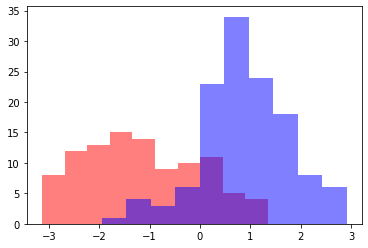

In [ ]:
import matplotlib.pyplot as plt
X_lda = lda.transform(X_train)
plt.hist(X_lda[y_train==0],color="red",alpha=0.5)
plt.hist(X_lda[y_train==1],color="blue",alpha=0.5)

As seen by the visualization, LDA separates the target variables into 2 normal distributions. It then makes the prediction of 1 when a value of the transformed dataset is > 0 and 0 when a value is < 0.

b. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=42, max_iter=1000)
log.fit(X_train, y_train)
log.score(X_test,y_test)

0.8289473684210527

c. kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test,y_test)

0.5657894736842105

d.  How do the various models perform on the dataset? Which model is most interpretable? Which model performed the best in terms of accuracy? Lastly, do your results from kNN function implemented in (c), using scikit-learn, and from the function you created (in Question 2) differ? If so, why?  

In [ ]:
diff = 0
y_pred = MyKNN(X_train,y_train,3,2,X_test)
y_hat = knn.predict(X_test)
for i in range(len(y_hat)):
  if y_hat[i]!=y_pred[i]:
    diff = diff + 1
diff

20

The model with the greatest accuracy was Logistic Regression. kNN is easily the most interpretable model (predictions are determined by distance from k neighbors). The results are slightly different (20 of the 76), most likely due to some small differences in implementation. 